Импортируем необходимые библиотеки 

In [656]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from graphviz import Digraph

Читаем файл и переименуем названия колонок для удобства

In [657]:
df = pd.read_csv("DATA.csv")
column_name = ["STUDENT ID", "Student Age","Sex","Graduated high-school type","Scholarship type","Additional work","Regular artistic or sports activity","Do you have a partner","Total salary if available","Transportation to the university","Accommodation type","Mother's education","Father's education","Number of sisters/brothers","Parental status","Mother's occupation","Father's occupation","Weekly study hours","Reading frequency (non-scientific books/journals)","Reading frequency (scientific books/journals)","Attendance to the seminars/conferences related to the department","Impact of your projects/activities on your success","Attendance to classes","Preparation to midterm exams 1","Preparation to midterm exams 2","Taking notes in classes","Listening in classes","Discussion improves my interest and success in the course","Flip-classroom","Cumulative grade point average in the last semester","Expected Cumulative grade point average in the graduation","COURSE ID","GRADE"]
df.columns = column_name
df           

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester,Expected Cumulative grade point average in the graduation,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


Как можно видеть из вывода в данных пропуски отсутствуют, поэтому дополнительной обработки не требуется

In [658]:
print(df.isnull().sum())

STUDENT ID                                                          0
Student Age                                                         0
Sex                                                                 0
Graduated high-school type                                          0
Scholarship type                                                    0
Additional work                                                     0
Regular artistic or sports activity                                 0
Do you have a partner                                               0
Total salary if available                                           0
Transportation to the university                                    0
Accommodation type                                                  0
Mother's education                                                  0
Father's education                                                  0
Number of sisters/brothers                                          0
Parental status     

Выведем основные характеристики для каждого признака

In [659]:
df.describe()

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester,Expected Cumulative grade point average in the graduation,COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


Введём пороговое значение оценки, по которму в дальнейшем будем определять успешность студента

In [660]:
grade_threshold = (np.min(df['GRADE']) + np.max(df['GRADE'])) / 2
grade_threshold = round(grade_threshold)
print(grade_threshold)

4


Введём новую метрику SUCCESS. Определим признаки и целевую переменную SUCCESS

In [661]:
df['SUCCESS'] = (df['GRADE'] > grade_threshold).astype(int)
features = list(df.columns.drop(['STUDENT ID','GRADE','SUCCESS']))
target = 'SUCCESS'
df.sample(15)

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester,Expected Cumulative grade point average in the graduation,COURSE ID,GRADE,SUCCESS
120,STUDENT121,2,1,1,3,1,1,1,2,2,...,1,3,3,3,2,2,2,8,1,0
78,STUDENT79,2,1,2,4,1,1,2,1,1,...,1,3,3,2,2,2,2,4,4,0
108,STUDENT109,2,1,1,5,2,1,2,2,2,...,1,2,3,1,2,3,3,7,6,1
45,STUDENT46,1,2,2,3,2,2,1,4,1,...,1,2,2,2,1,4,3,1,3,0
112,STUDENT113,2,1,3,3,1,2,2,1,3,...,1,3,3,3,1,4,2,8,2,0
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,1,2,1,2,1,5,3,9,4,0
115,STUDENT116,2,1,2,5,1,2,1,1,1,...,2,3,2,3,2,2,2,8,1,0
26,STUDENT27,2,2,2,3,2,1,1,1,1,...,1,3,3,3,2,2,1,1,1,0
7,STUDENT8,1,1,2,3,1,1,1,2,2,...,1,3,2,2,1,1,1,1,2,0
40,STUDENT41,1,2,1,3,2,2,2,2,1,...,1,3,1,2,1,2,3,1,1,0


Разделим выборку на обучающий и тестовый наборы данных

In [662]:
def split_data(df, test_size=0.2):
    X = df[features].values
    Y = df[target].values
    np.random.seed(42)
    indices = np.random.permutation(len(X))
    test_samples = int(len(X) * test_size)
    train_indices = indices[test_samples:]
    test_indices = indices[:test_samples]
    X_train = X[train_indices]
    X_test = X[test_indices]
    Y_train = Y[train_indices]
    Y_test = Y[test_indices]
    print(f"Количество элементов в обучающей выборке X: {X_train.shape}")
    print(f"Количество элементов в тестовой выборке X: {X_test.shape}")
    print(f"Количестов элементов в обучающей выборке Y: {Y_train.shape}")
    print(f"Количество элементов в тестовой выборке Y: {Y_test.shape}")
    return X_train, X_test, Y_train, Y_test

Создадим классы для построения дерева решений и его узлов

In [663]:
class Node:
    def __init__(self, feature=None, children=None, predicted_class=None, proportions=None):
        self.feature = feature
        self.children = children if children else {}
        self.predicted_class = predicted_class
        self.proportions = proportions

class DecisionTree:
    def __init__(self, max_depth=None, n_classes=None):
        self.max_depth = max_depth
        self.n_classes = n_classes
        self.root = None
        self.selected_features = None
        self.feature_names = None

    def fit(self, X, y):
        np.random.seed(None)
        self.feature_names = features
        selected_indices = np.random.choice(X.shape[1], int(sqrt(X.shape[1])), replace=False) # выбираем рандомно sqrt(n) признаков, от общего числа признаков
        self.selected_features = [self.feature_names[i] for i in selected_indices]
        print(f"Выбранные признаки для дерева: {self.selected_features}")
        self.root = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_labels = np.unique(y)

        if len(unique_labels) == 1 or n_samples == 0 or (self.max_depth is not None and depth >= self.max_depth): # завершаем рост дерева если в узле больше нет данных, все данные относятся к одному классу или достигнута максимальная глубина
            proportions = np.bincount(y, minlength=self.n_classes) / len(y) if n_samples > 0 else np.zeros(self.n_classes) # пропорции классов в узле = количестов объектов класса/ общее кол-во объектов
            return Node(predicted_class=unique_labels[0] if n_samples > 0 else None, proportions=proportions)

        features_indices = [self.feature_names.index(f) for f in self.selected_features]
        best_feature, best_gain = None, -float("inf")
        feature_splits = None
        for feature_idx in features_indices:
            unique_values = np.unique(X[:, feature_idx]) # находим уникальные значения признаков
            splits = {val: y[X[:, feature_idx] == val] for val in unique_values} # разбиваем данные по значениям признака
            gain = self._information_gain_multiple(splits, y)
            if gain > best_gain:
                best_feature, best_gain = feature_idx, gain
                feature_splits = splits
        # если признак не найден делаем узел листом
        if best_feature is None:
            proportions = np.bincount(y, minlength=len(np.unique(y))) / len(y)
            return Node(predicted_class=np.bincount(y).argmax(), proportions=proportions)

        children = {}
        for value, child_y in feature_splits.items():
            idx = X[:, best_feature] == value # выбираем индексы объектов для лучшего признака
            child_X = X[idx] 
            children[value] = self._build_tree(child_X, child_y, depth + 1)
        return Node(feature=best_feature, children=children)

    def _information_gain_multiple(self, splits, parent_y):
        parent_entropy = self._entropy(parent_y)
        total_samples = sum(len(subset) for subset in splits.values()) # считаем общее кол-во объектов после разбиения на группы

        child_entropy = sum(
            (len(subset) / total_samples) * self._entropy(subset)
            for subset in splits.values()
        ) # средняя энтропия для дочернего узла

        return parent_entropy - child_entropy

    def _entropy(self, y):
        proportions = np.bincount(y, minlength=len(np.unique(y))) / len(y)
        return -np.sum([p * np.log2(p) for p in proportions if p > 0]) # -sum(p*log2(p))

    def predict(self, X):
        return np.array([self._predict(inputs, self.root) for inputs in X])

    def _predict(self, inputs, node):
        if node.feature is None:
            return node.predicted_class

        feature_value = inputs[node.feature] # извлекаем значение признака для текущего узла
        if feature_value in node.children:
            return self._predict(inputs, node.children[feature_value])
        else:
            child_classes = [child.predicted_class for child in node.children.values()]
            majority_class = max(set(child_classes), key=child_classes.count) # выбираем наиболее вероятный класс
            return majority_class

    def predict_proba(self, X):
        return np.vstack([self._predict_proba(inputs, self.root) for inputs in X])

    def _predict_proba(self, inputs, node):
        if node.feature is None:
            return node.proportions
        feature_value = inputs[node.feature]
        if feature_value in node.children:
            return self._predict_proba(inputs, node.children[feature_value])
        else:
            valid_proportions = [
                child.proportions for child in node.children.values() if child.proportions is not None
            ] # собираем пропорции всех дочерних узлов
            if len(valid_proportions) == 0:
                return np.zeros(self.n_classes) # если нет узлов с пропорциями возвращаем массив нулей
            return np.mean(valid_proportions, axis=0) #возвращаем средние значения пропорции

    def visualize_tree(self):
        graph = Digraph()
        self._add_nodes_edges(self.root, graph, node_id='0')
        return graph

    def _add_nodes_edges(self, node, graph, node_id):
        if node.feature is not None:
            label = f"{self.feature_names[node.feature]}"
            graph.node(node_id, label=label)
            for value, child in node.children.items():
                child_id = f"{node_id}-{value}"
                child_label = f"Value: {value}"
                graph.edge(node_id, child_id, label=child_label)
                self._add_nodes_edges(child, graph, child_id)
        else:
            label = f"Class: {node.predicted_class}\nProbs: {node.proportions}"
            graph.node(node_id, label=label, shape="ellipse")

Рассчитаем основные метрики для нашего дерева. Accuracy показывает количество правильно предсказанных классов к из общему количеству. Precision показывает какое количестов предсказанных моделью положительных классов является верным. Recall показывает какое количество правильно предсказанных положительных классов является верным по отношению к общему числу положительных классов

In [664]:
def calculate_metrics(y_true, y_pred):
    precision_sum, recall_sum, accuracy_sum = 0, 0, 0
    num_classes = len(np.unique(y_true))
    for cls in np.unique(y_true):
        TruePositive = np.sum((y_pred == cls) & (y_true == cls))
        FalsePositive = np.sum((y_pred == cls) & (y_true != cls))
        FalseNegative = np.sum((y_pred != cls) & (y_true == cls))
        TrueNegative = np.sum((y_pred != cls) & (y_true != cls))

        precision = TruePositive / (TruePositive + FalsePositive) if (TruePositive + FalsePositive) > 0 else 0
        recall = TruePositive / (TruePositive + FalseNegative) if (TruePositive + FalseNegative) > 0 else 0
        accuracy = (TruePositive + TrueNegative) / len(y_true)
        
        precision_sum += precision
        recall_sum += recall
        accuracy_sum += accuracy
    
    average_precision = precision_sum/num_classes
    average_recall = recall_sum / num_classes
    average_accuracy = accuracy_sum / num_classes

    return average_precision, average_recall, average_accuracy

Создадим метод для определения наилучшего порога для задачи классификации

In [665]:
def find_best_threshold(y_true, y_proba):
    thresholds = np.arange(0.0, 1.05, 0.05)
    best_threshold = 0.5
    best_f1 = 0

    for threshold in thresholds:
        y_pred = (y_proba[:, 1] >= threshold).astype(int)
        accuracy, precision, recall = calculate_metrics(y_true, y_pred)
        f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    
    return best_threshold

Рассчитаем True Positive Rate, False Positive Rate, Precision и Recall для построения кривых AUC-ROC (Area Under Receiver Operating Characterisitc) и AUC-PR (Area Under Precision-Recall). Обе эти метрики используются для оценки способности модели различать положительные и отрицательные классы на различных порогах вероятности

In [666]:
def calc_roc_pr_curves(y_true, y_proba):
    thresholds = np.linspace(0,1,100)
    tpr, fpr, precisions, recalls = [], [], [], []
    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        TruePositive = np.sum((y_pred == 1) & (y_true == 1))
        FalsePositive = np.sum((y_pred == 1) & (y_true == 0))
        FalseNegative = np.sum((y_pred == 0) & (y_true == 1))
        TrueNegative = np.sum((y_pred == 0) & (y_true == 0))
        tpr.append(TruePositive / (TruePositive + FalseNegative) if (TruePositive + FalseNegative) > 0 else 0)
        fpr.append(FalsePositive / (FalsePositive + TrueNegative) if (FalsePositive + TrueNegative) > 0 else 0)
        precisions.append(TruePositive / (TruePositive + FalsePositive) if (TruePositive + FalsePositive) > 0 else 0)
        recalls.append(TruePositive / (TruePositive + FalseNegative) if (TruePositive + FalseNegative) > 0 else 0)
        
    return tpr, fpr, precisions, recalls

Построим и визуализируем дерево решений на основе выбранных признаков, а также рассчитаем accuracy, precision и recall

In [669]:
X_train, X_test, Y_train, Y_test = split_data(df)
tree = DecisionTree(max_depth=3, n_classes=2)
tree.fit(X_train, Y_train)
y_proba = tree.predict_proba(X_test)
best_threshold = find_best_threshold(Y_test, y_proba)
y_pred = (y_proba[:, 1] >= best_threshold).astype(int)

precision, recall, accuracy = calculate_metrics(Y_test, y_pred)
graph = tree.visualize_tree()

print(f"Decision Tree:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
graph.render("decision_tree", format="png", cleanup=True)


Количество элементов в обучающей выборке X: (116, 31)
Количество элементов в тестовой выборке X: (29, 31)
Количестов элементов в обучающей выборке Y: (116,)
Количество элементов в тестовой выборке Y: (29,)
Выбранные признаки для дерева: ['Additional work', 'Flip-classroom', 'Cumulative grade point average in the last semester', 'Reading frequency (scientific books/journals)', 'Impact of your projects/activities on your success']
Decision Tree:
Accuracy: 0.6206896551724138
Precision: 0.6418269230769231
Recall: 0.663888888888889


'decision_tree.png'

Построим графики кривых AUC-ROC и AUC-PR

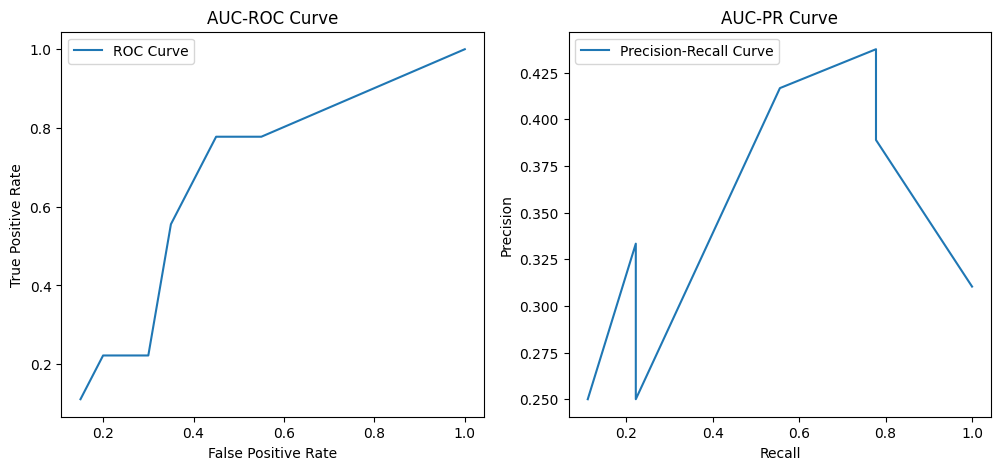

In [670]:
tpr, fpr, precisions, recalls = calc_roc_pr_curves(Y_test, y_proba[:, 1])
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('AUC-PR Curve')
plt.legend()
plt.show()